In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
"""
Visualization. Create visual summaries of the (a) author texts, (b) words, and (c) both words and
author texts. You can present multiple visualizations for each task, but be sure to highlight what
you think is the single best visualization for each task that helps illuminates major patterns. Justify
your choice. (Methods such as PCA, NMF, MDS (try different distances), tSNE, graphical models,
and biclustering, among others, may be helpful). Which methods yield the most interpretable visual
representations of the data? Interpret and reflect upon your results.

"""

'\nVisualization. Create visual summaries of the (a) author texts, (b) words, and (c) both words and\nauthor texts. You can present multiple visualizations for each task, but be sure to highlight what\nyou think is the single best visualization for each task that helps illuminates major patterns. Justify\nyour choice. (Methods such as PCA, NMF, MDS (try different distances), tSNE, graphical models,\nand biclustering, among others, may be helpful). Which methods yield the most interpretable visual\nrepresentations of the data? Interpret and reflect upon your results.\n\n'

In [4]:
#!pip install pyreadr

In [5]:
import numpy as np

In [6]:
from os import sys
sys.path.append("../../../machine_learning_tools/")

In [7]:
import data_input_utils as diu
import pandas_ml as pdml
import pandas as pd

In [8]:
#df = diu.df_from_rda('./authors.rda')
df = pd.read_csv("./authorship.csv")
df = df[[k for k in df.columns if k not in ["BookID"]]]
X,y = pdml.X_y(df,target_name = "Author")

In [9]:
# the list of word counts
np.array(list(X.columns))

array(['a', 'all', 'also', 'an', 'and', 'any', 'are', 'as', 'at', 'be',
       'been', 'but', 'by', 'can', 'do', 'down', 'even', 'every', 'for',
       'from', 'had', 'has', 'have', 'her', 'his', 'if', 'in', 'into',
       'is', 'it', 'its', 'may', 'more', 'must', 'my', 'no', 'not', 'now',
       'of', 'on', 'one', 'only', 'or', 'our', 'should', 'so', 'some',
       'such', 'than', 'that', 'the', 'their', 'then', 'there', 'things',
       'this', 'to', 'up', 'upon', 'was', 'were', 'what', 'when', 'which',
       'who', 'will', 'with', 'would', 'your'], dtype='<U6')

In [10]:
X_feat = X.transpose()
X_feat,y_feat = pdml.X_y(X_feat.reset_index(),"index")
X_feat

,0,1,2,3,4,5,6,7,8,9,...,831,832,833,834,835,836,837,838,839,840
0,46,35,46,40,29,27,34,38,34,54,...,46,48,39,22,28,32,16,22,25,26
1,12,10,2,7,5,8,8,6,12,8,...,4,2,5,13,7,4,5,15,4,4
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,7,3,4,6,3,15,2,5,6,...,3,9,10,5,7,6,5,3,8,2
4,66,44,40,64,52,42,44,67,50,44,...,43,45,38,47,45,33,49,48,59,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,8,3,4,5,2,6,4,6,1,3,...,1,0,2,4,2,3,0,0,2,3
65,4,5,5,3,4,3,9,7,2,5,...,7,10,8,9,7,11,11,12,22,11
66,9,14,15,22,21,18,11,15,13,15,...,18,11,26,12,8,17,20,15,23,19
67,1,8,3,4,10,4,6,3,12,6,...,2,6,2,6,3,5,2,1,4,0


In [11]:
import matplotlib_ml as mlu

labels_str = y.to_numpy()
(labels_str_unique,
 idx_to_name_map,
 labels_idx) = np.unique(labels_str,
                         return_index=True,
                         return_inverse=True)
str_order = labels_str[idx_to_name_map]
str_to_idx_map = text_to_plot_authors = {s:l_i for l_i,s in 
                        enumerate(str_order)}

# labels_colors = np.array(
#     mlu.generate_non_randon_named_color_list(
#         len(labels_str_unique))
# )
print(f"labels_str_unique = {labels_str_unique}")
# print(f"labels_colors= {labels_colors}")

str_to_idx_map

labels_str_unique = ['Austen' 'London' 'Milton' 'Shakespeare']


{'Austen': 0, 'London': 1, 'Milton': 2, 'Shakespeare': 3}

In [12]:
labels_str_feat = y_feat.to_numpy()
(labels_str_feat_unique,
 idx_to_name_map_feat,
 labels_feat_idx) = np.unique(labels_str_feat,
                         return_index=True,
                         return_inverse=True)
str_order_feat = labels_str_feat[idx_to_name_map_feat]
str_to_idx_map_feat = text_to_plot_authors = {s:l_i for l_i,s in 
                        enumerate(str_order_feat)}
str_to_idx_map_feat

{'a': 0,
 'all': 1,
 'also': 2,
 'an': 3,
 'and': 4,
 'any': 5,
 'are': 6,
 'as': 7,
 'at': 8,
 'be': 9,
 'been': 10,
 'but': 11,
 'by': 12,
 'can': 13,
 'do': 14,
 'down': 15,
 'even': 16,
 'every': 17,
 'for': 18,
 'from': 19,
 'had': 20,
 'has': 21,
 'have': 22,
 'her': 23,
 'his': 24,
 'if': 25,
 'in': 26,
 'into': 27,
 'is': 28,
 'it': 29,
 'its': 30,
 'may': 31,
 'more': 32,
 'must': 33,
 'my': 34,
 'no': 35,
 'not': 36,
 'now': 37,
 'of': 38,
 'on': 39,
 'one': 40,
 'only': 41,
 'or': 42,
 'our': 43,
 'should': 44,
 'so': 45,
 'some': 46,
 'such': 47,
 'than': 48,
 'that': 49,
 'the': 50,
 'their': 51,
 'then': 52,
 'there': 53,
 'things': 54,
 'this': 55,
 'to': 56,
 'up': 57,
 'upon': 58,
 'was': 59,
 'were': 60,
 'what': 61,
 'when': 62,
 'which': 63,
 'who': 64,
 'will': 65,
 'with': 66,
 'would': 67,
 'your': 68}

In [ ]:
# import matplotlib_ml as mlu

# labels_str_feat = y_feat.to_numpy()
# labels_str_feat_unique,labels_feat_idx = np.unique(labels_str_feat,return_inverse=True)
# labels_feat_colors = np.array(
#     mlu.generate_non_randon_named_color_list(
#         len(labels_str_feat_unique))
# )
# print(f"labels_str_unique = {labels_str_feat_unique}")
# print(f"labels_colors= {labels_feat_colors}")

In [13]:
n_components = 3

# Developing the dimension reduction methods

In [14]:
import dimensionality_reduction_utils as dru

In [15]:
"""
General Procedure:
1) Run the Dimensionality technique to get the data
projected into new space:
- PCA/NMF have new basis

2) Plot the data visualization

"""

'\nGeneral Procedure:\n1) Run the Dimensionality technique to get the data\nprojected into new space:\n- PCA/NMF have new basis\n\n2) Plot the data visualization\n\n'

# --- PCA ---

<IPython.core.display.Javascript object>


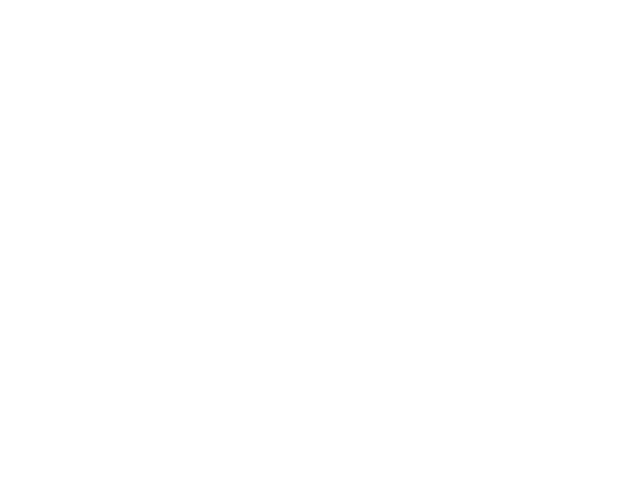

<IPython.core.display.Javascript object>


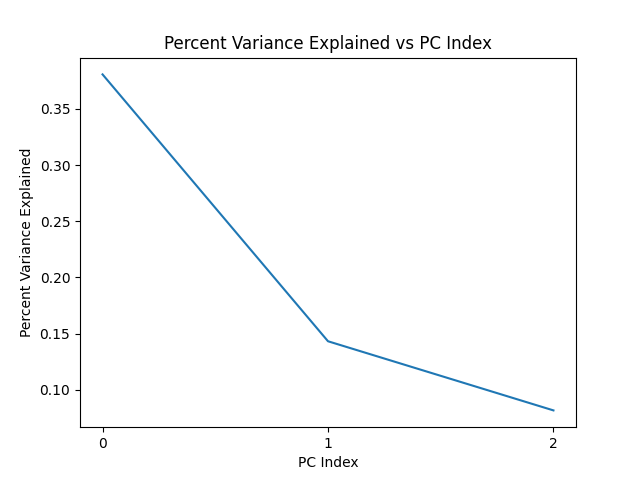

dict_keys(['mean', 'covaraince_matrix', 'eigenVectors', 'eigenValues', 'percent_variance_explained', 'percent_variance_explained_up_to_n_comp', 'data_proj', 'data_backproj', 'pca_obj', 'data'])

In [16]:
pca_data = dru.pca_analysis(X,
                            n_components=n_components,
                 plot_sqrt_eigvals=False,
                 plot_perc_variance_explained=True)
pca_data.keys()

<IPython.core.display.Javascript object>


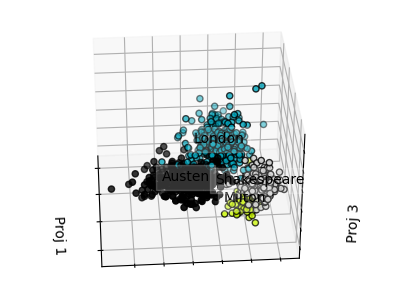

In [18]:
dru.plot_projected_data(
    pca_data["data_proj"][:,:n_components],
    labels_idx,
text_to_plot_dict=str_to_idx_map)

# pca on transposed data

<IPython.core.display.Javascript object>


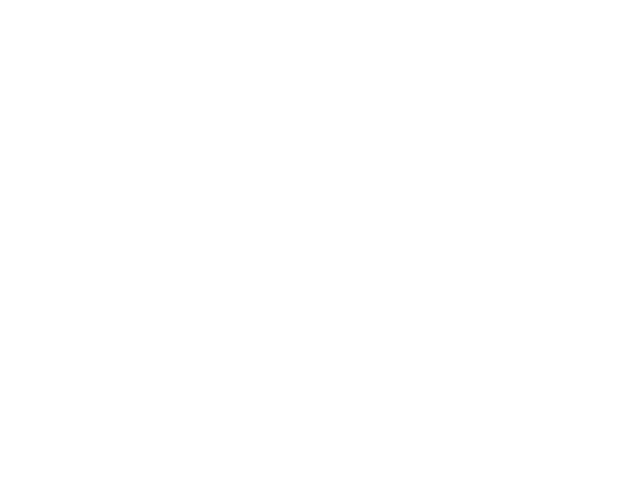

<IPython.core.display.Javascript object>


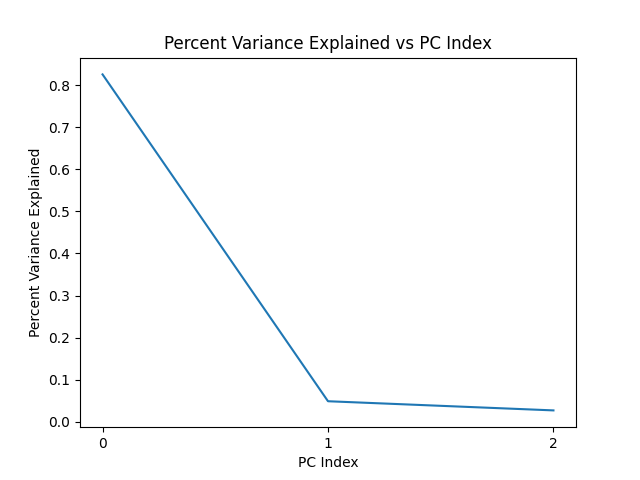

In [19]:
pca_data_feat = dru.pca_analysis(X_feat,
                                 n_components=n_components,
                 plot_sqrt_eigvals=False,
                 plot_perc_variance_explained=True,
                                )

<IPython.core.display.Javascript object>


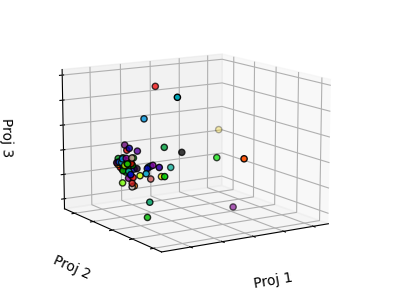

In [21]:
dru.plot_projected_data(
    pca_data_feat["data_proj"][:,:n_components],
    labels_feat_idx,
#text_to_plot_dict=str_to_idx_map_feat
)

<IPython.core.display.Javascript object>


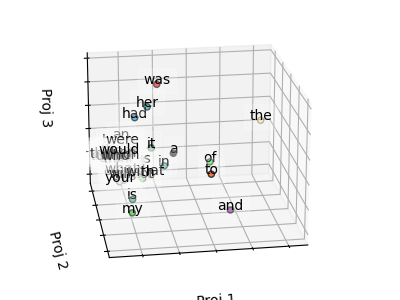

In [23]:
dru.plot_projected_data(
    pca_data_feat["data_proj"][:,:n_components],
    labels_feat_idx,
text_to_plot_dict=str_to_idx_map_feat
)

# -- NMF --

In [ ]:
from sklearn.decomposition import NMF
model = NMF(n_components=n_components, init='random', random_state=0)
#returns the transformed data
W = model.fit_transform(X)
H = model.components_

dru.plot_projected_data(
    W,
    labels=labels_idx)

In [ ]:
W = model.fit_transform(X_feat)
H = model.components_

dru.plot_projected_data(
    W,
    labels=labels_feat_idx)

# ---MDS (Multi-Dimensional Scaling)---

In [ ]:
"""
Purpose: Doing the eigenvalue decomposition 
of a distance matrix
"""

In [ ]:
from sklearn.manifold import MDS
model = MDS(n_components=n_components)
#returns the transformed data
W = model.fit_transform(X)

dru.plot_projected_data(
    W,
    labels=labels_idx)

In [ ]:
W = model.fit_transform(X_feat)

dru.plot_projected_data(
    W,
    labels=labels_feat_idx)

# --- tsne --

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=n_components)
#returns the transformed data
W = model.fit_transform(X)

dru.plot_projected_data(
    W,
    labels=labels_idx)

In [ ]:
W = model.fit_transform(X_feat)

dru.plot_projected_data(
    W,
    labels=labels_feat_idx)

# Hierarchical Clustering

In [ ]:
import clustering_utils as clu

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering, FeatureAgglomeration

In [ ]:
data = X#X.iloc[:50,]

linkage = linkage = ['ward','average','single','complete'][1]

model = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage=linkage)
model.fit(data)
leaves_observation = clu.dendrogram_leaves_ordered(model)

model = FeatureAgglomeration(
    distance_threshold=0, n_clusters=None, linkage=linkage)
model.fit(data)
leaves_features = clu.dendrogram_leaves_ordered(model)

df = data.iloc[leaves_observation,leaves_features]

fig,ax = plt.subplots(1,figsize=(10,5))
sns.heatmap(df_reordered
           )#,cmap=cmap,norm =LogNorm())